In [1]:
import json
import pandas as pd
import numpy as np
import csv

In [2]:
% cd drive/MyDrive/Kaggle/Aircraft\ Engine
!ls

/content/drive/MyDrive/Kaggle/Aircraft Engine
'Damage Propagation Modeling.pdf'   RUL_FD003.txt    train_FD001.txt
 newtest.csv			    RUL_FD004.txt    train_FD002.txt
 newtrain.csv			    test_FD001.txt   train_FD003.txt
 readme.txt			    test_FD002.txt   train_FD004.txt
 RUL_FD001.txt			    test_FD003.txt
 RUL_FD002.txt			    test_FD004.txt


In [ ]:
import requests, zipfile
from io import BytesIO

r = requests.get('https://ti.arc.nasa.gov/c/6/', stream=True)
z = zipfile.ZipFile(BytesIO(r.content))
z.extractall()

In [ ]:
!ls

'Damage Propagation Modeling.pdf'   RUL_FD004.txt    train_FD001.txt
 readme.txt			    test_FD001.txt   train_FD002.txt
 RUL_FD001.txt			    test_FD002.txt   train_FD003.txt
 RUL_FD002.txt			    test_FD003.txt   train_FD004.txt
 RUL_FD003.txt			    test_FD004.txt


In [ ]:
train = pd.read_csv('train_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
test = pd.read_csv('test_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)
RUL = pd.read_csv('RUL_FD001.txt', parse_dates=False, delimiter=" ", decimal=".", header=None)

In [ ]:
tableNA = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1)
tableNA.columns = ['train', 'test']

In [ ]:
train.drop(train.columns[[-1,-2]], axis=1, inplace=True)
test.drop(test.columns[[-1,-2]], axis=1, inplace=True)

In [ ]:
cols = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
train.columns = cols
test.columns = cols

In [ ]:
train.head()
test.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [ ]:
train.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)
test.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'op_setting3'], axis=1, inplace=True)

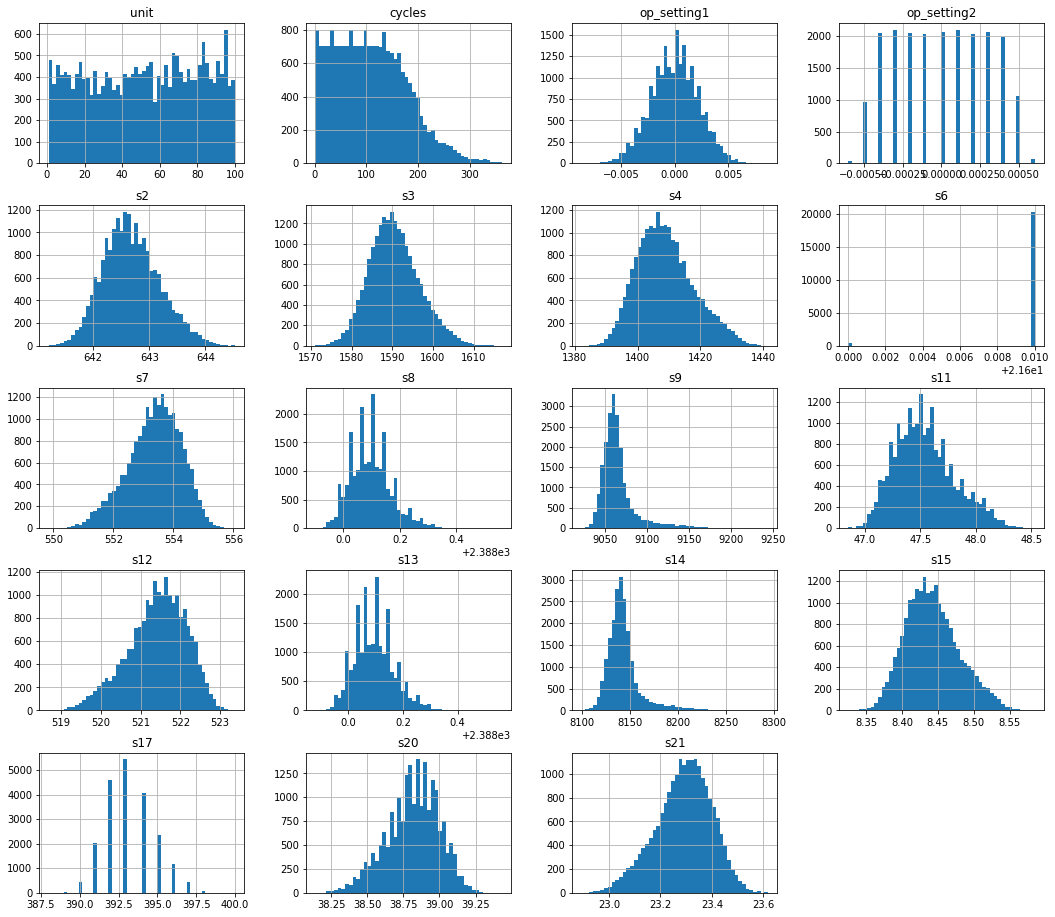

In [ ]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(18,16))
plt.show()

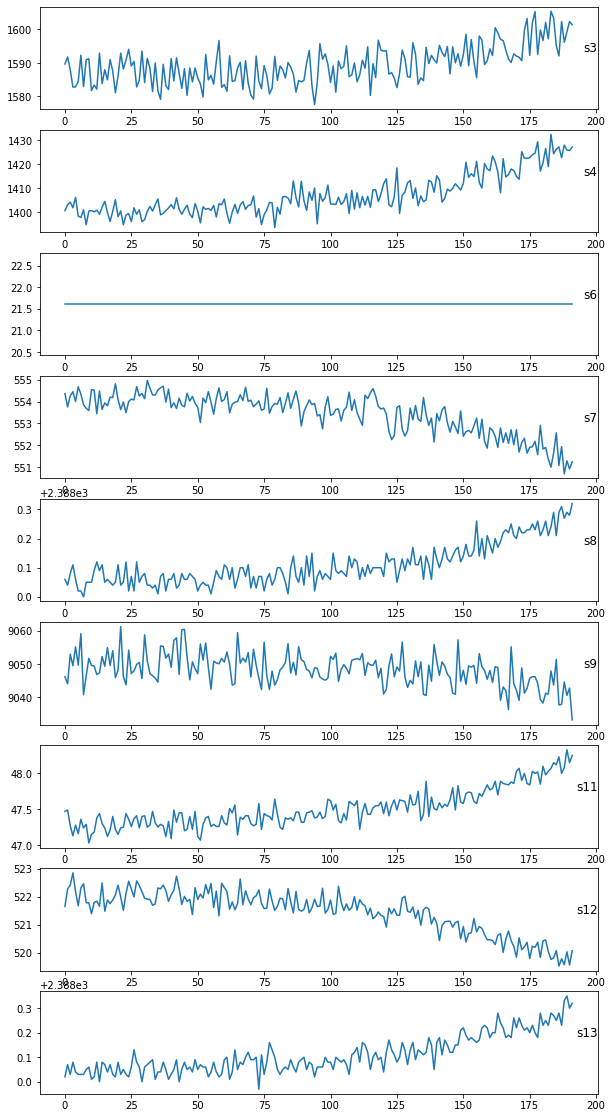

In [ ]:
values = train[train.unit==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(train.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
# s3, s4, s8, s11, s13
# 5, 6, 9, 11, 13

In [ ]:
newtrain = pd.concat([train['s3'], train['s4'], train['s8'], train['s11'], train['s13']], axis=1, keys=['s1','s2','s3','s4','target'])
newtest = pd.concat([test['s3'], test['s4'], test['s8'], test['s11'], test['s13']], axis=1, keys=['s1','s2','s3','s4','target'])

In [ ]:
print(newtrain.head())
newtest.head()

        s1       s2       s3     s4   target
0  1589.70  1400.60  2388.06  47.47  2388.02
1  1591.82  1403.14  2388.04  47.49  2388.07
2  1587.99  1404.20  2388.08  47.27  2388.03
3  1582.79  1401.87  2388.11  47.13  2388.08
4  1582.85  1406.22  2388.06  47.28  2388.04


,s1,s2,s3,s4,target
0,1585.29,1398.21,2388.04,47.20,2388.03
1,1588.45,1395.42,2388.01,47.50,2388.06
2,1586.94,1401.34,2388.05,47.50,2388.03
3,1584.12,1406.42,2388.03,47.28,2388.05
4,1587.19,1401.92,2388.01,47.31,2388.03


In [ ]:
newtest.to_csv('newtest.csv')
newtrain.to_csv('newtrain.csv')

In [3]:
newtest=pd.read_csv('newtest.csv')
newtrain=pd.read_csv('newtrain.csv')

In [4]:
y_train = newtrain['target']
y_test_v = newtest['target']

In [5]:
x_train = newtrain
x_test = newtest
x_train.drop(['Unnamed: 0'], inplace=True, axis=1)
x_test.drop(['Unnamed: 0'], inplace=True, axis=1)
x_train.drop(['target'], inplace=True, axis=1)
x_test.drop(['target'], inplace=True, axis=1)
print(x_test.head())
x_train.head()

        s1       s2       s3     s4
0  1585.29  1398.21  2388.04  47.20
1  1588.45  1395.42  2388.01  47.50
2  1586.94  1401.34  2388.05  47.50
3  1584.12  1406.42  2388.03  47.28
4  1587.19  1401.92  2388.01  47.31


,s1,s2,s3,s4
0,1589.70,1400.60,2388.06,47.47
1,1591.82,1403.14,2388.04,47.49
2,1587.99,1404.20,2388.08,47.27
3,1582.79,1401.87,2388.11,47.13
4,1582.85,1406.22,2388.06,47.28


In [6]:
features = x_train.columns
features

Index(['s1', 's2', 's3', 's4'], dtype='object')

In [7]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

In [8]:
x_train.shape

(20631, 4)

In [9]:
x_train

,s1,s2,s3,s4
0,1589.70,1400.60,2388.06,47.47
1,1591.82,1403.14,2388.04,47.49
2,1587.99,1404.20,2388.08,47.27
3,1582.79,1401.87,2388.11,47.13
4,1582.85,1406.22,2388.06,47.28
...,...,...,...,...
20626,1597.98,1428.63,2388.19,48.07
20627,1604.50,1433.58,2388.23,48.04
20628,1602.46,1428.18,2388.24,48.09
20629,1605.26,1426.53,2388.25,48.39


In [10]:
xscaler = StandardScaler()
xscaler.fit(x_train)
x_train = xscaler.transform(x_train)

In [11]:
x_train

array([[-0.13425518, -0.92593596, -0.51633841, -0.2664666 ],
       [ 0.21152849, -0.64372587, -0.798093  , -0.19158293],
       [-0.41316559, -0.52595315, -0.23458381, -1.0153033 ],
       ...,
       [ 1.94697106,  2.13837684,  2.01945293,  2.05492719],
       [ 2.40366648,  1.95505138,  2.16033023,  3.17818224],
       [ 1.60771161,  2.57835793,  2.30120753,  2.46678737]])

In [12]:
x_test

,s1,s2,s3,s4
0,1585.29,1398.21,2388.04,47.20
1,1588.45,1395.42,2388.01,47.50
2,1586.94,1401.34,2388.05,47.50
3,1584.12,1406.42,2388.03,47.28
4,1587.19,1401.92,2388.01,47.31
...,...,...,...,...
13091,1599.45,1415.79,2388.02,47.69
13092,1595.69,1422.05,2388.05,47.60
13093,1593.15,1406.82,2388.11,47.57
13094,1594.99,1419.36,2388.07,47.61


In [13]:
xscaler.fit(x_test)
x_test = xscaler.transform(x_test)
x_test

array([[-0.56149466, -0.97567424, -0.53907794, -1.10359065],
       [ 0.0701159 , -1.39283595, -1.06136579,  0.42772659],
       [-0.23169801, -0.50767562, -0.364982  ,  0.42772659],
       ...,
       [ 1.00953667,  0.31169576,  0.67959369,  0.78503394],
       [ 1.37730991,  2.18668064, -0.0167901 ,  0.98920958],
       [ 2.70249283,  3.02848007, -0.19088605,  1.95904382]])

In [14]:
x_train = pd.DataFrame(x_train, columns = ['s1','s2','s3','s4'])
print(x_train)
x_test = pd.DataFrame(x_test, columns = ['s1','s2','s3','s4'])
print(x_test)

             s1        s2        s3        s4
0     -0.134255 -0.925936 -0.516338 -0.266467
1      0.211528 -0.643726 -0.798093 -0.191583
2     -0.413166 -0.525953 -0.234584 -1.015303
3     -1.261314 -0.784831  0.188048 -1.539489
4     -1.251528 -0.301518 -0.516338 -0.977861
...         ...       ...       ...       ...
20626  1.216258  2.188375  1.315066  1.980044
20627  2.279706  2.738351  1.878576  1.867718
20628  1.946971  2.138377  2.019453  2.054927
20629  2.403666  1.955051  2.160330  3.178182
20630  1.607712  2.578358  2.301208  2.466787

[20631 rows x 4 columns]
             s1        s2        s3        s4
0     -0.561495 -0.975674 -0.539078 -1.103591
1      0.070116 -1.392836 -1.061366  0.427727
2     -0.231698 -0.507676 -0.364982  0.427727
3     -0.795350  0.251888 -0.713174 -0.695239
4     -0.181729 -0.420954 -1.061366 -0.542108
...         ...       ...       ...       ...
13091  2.268760  1.652893 -0.887270  1.397561
13092  1.517224  2.588890 -0.364982  0.938166
13093  1

In [15]:
y_train

0        2388.02
1        2388.07
2        2388.03
3        2388.08
4        2388.04
          ...   
20626    2388.26
20627    2388.22
20628    2388.24
20629    2388.23
20630    2388.26
Name: target, Length: 20631, dtype: float64

In [16]:
y_test_v

0        2388.03
1        2388.06
2        2388.03
3        2388.05
4        2388.03
          ...   
13091    2388.00
13092    2388.09
13093    2388.04
13094    2388.08
13095    2388.05
Name: target, Length: 13096, dtype: float64

In [ ]:
lr_class = LinearRegression()

lr_class.fit(x_train,y_train)
lr_class.score(x_test,y_test_v)

0.33630772687471777

In [17]:
rf_class = RandomForestRegressor(random_state=1, n_estimators=100, max_depth=6, min_samples_leaf=1)

rf_class.fit(x_train,y_train)
rf_class.score(x_test,y_test_v)

0.33502529165914474

In [ ]:
from xgboost import XGBRegressor
#xgb1 = XGBRegressor(random_state=1, n_estimators=100, max_depth=10, min_samples_leaf=2)
xgb1 = XGBRegressor(random_state=1, n_estimators=100, max_depth=8, min_samples_leaf=2)

xgb1.fit(x_train,y_train)
xgb1.score(x_test,y_test_v)

[16:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.08391965073592578

In [ ]:
#xgb2 = 
xgb2 = XGBRegressor(random_state=1, n_estimators=110, max_depth=8, min_samples_leaf=2)

xgb2.fit(x_train,y_train)
xgb2.score(x_test,y_test_v)

[16:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5340886331109597

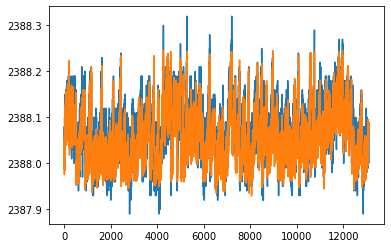

In [ ]:
x=[]
for i in range(len(x_test)):
  x.append(i)
y2 = (xgb2.predict(x_test)+xgb1.predict(x_test))/2
y1 = y_test_v
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y2, y1)

0.4364030243973728

In [18]:
#Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score

def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(50, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(40, kernel_initializer='normal', activation='relu'))
	model.add(Dense(30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(20, kernel_initializer='normal', activation='relu'))
	model.add(Dense(10, kernel_initializer='normal', activation='relu'))
	model.add(Dense(20, kernel_initializer='normal', activation='relu'))
	model.add(Dense(30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(40, kernel_initializer='normal', activation='relu'))
	model.add(Dense(50, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

ANN = larger_model()
ANN.fit(x_train, y_train, epochs=30)
#ANN.evaluate(x_test,y_test_v)
r2_score(ANN.predict(x_test), y_test_v)

Epoch 1/30
645/645 [==============================] - 2s 2ms/step - loss: 903591.2500
Epoch 2/30
645/645 [==============================] - 1s 2ms/step - loss: 165.6721
Epoch 3/30
645/645 [==============================] - 1s 2ms/step - loss: 37.8320
Epoch 4/30
645/645 [==============================] - 1s 2ms/step - loss: 14.8975
Epoch 5/30
645/645 [==============================] - 1s 2ms/step - loss: 7.0956
Epoch 6/30
645/645 [==============================] - 1s 2ms/step - loss: 3.9075
Epoch 7/30
645/645 [==============================] - 1s 2ms/step - loss: 2.4263
Epoch 8/30
645/645 [==============================] - 1s 2ms/step - loss: 1.5958
Epoch 9/30
645/645 [==============================] - 1s 2ms/step - loss: 1.8082
Epoch 10/30
645/645 [==============================] - 1s 2ms/step - loss: 2.4197
Epoch 11/30
645/645 [==============================] - 1s 2ms/step - loss: 12.1859
Epoch 12/30
645/645 [==============================] - 1s 2ms/step - loss: 74.7862
Epoch 13/30
64

-0.03096972803362963

In [ ]:
result_ann = ANN.predict(x_test)
result_ann.shape = rf_class.predict(x_test).shape

In [25]:
arr = [[1500,350,600,30]]
xscaler.fit(arr)
arr = xscaler.transform(arr)
arr = pd.DataFrame(arr, columns = ['s1','s2','s3','s4'])
ANN.predict(arr)

array([[2388.1812]], dtype=float32)

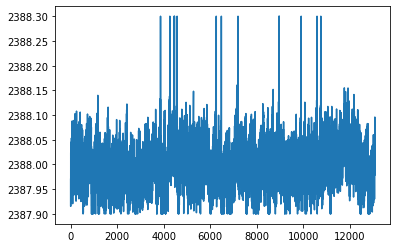

In [ ]:
x=[]
for i in range(len(x_test)):
  x.append(i)  
for i in range(len(result_ann)):
  if result_ann[i]>2388.3000:
    result_ann[i]=2388.3000
  if result_ann[i]<2387.9000:
    result_ann[i]=2387.9000
y2 = result_ann
y1 = y_test_v
#plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [ ]:
#pred_y_test=((xgb1.predict(x_test)+rf_class.predict(x_test)+lr_class.predict(x_test))/3 +(xgb1.predict(x_test)+xgb2.predict(x_test))/2)/2
pred_y_test=(result_ann+6*rf_class.predict(x_test)+6*lr_class.predict(x_test)+6*xgb1.predict(x_test)+5*xgb2.predict(x_test))/24

In [ ]:
result_ann

array([2388.067 , 2388.061 , 2388.0776, ..., 2388.0996, 2388.0576,
       2388.0432], dtype=float32)

In [ ]:
y_test_v

0        2388.03
1        2388.06
2        2388.03
3        2388.05
4        2388.03
          ...   
13091    2388.00
13092    2388.09
13093    2388.04
13094    2388.08
13095    2388.05
Name: target, Length: 13096, dtype: float64

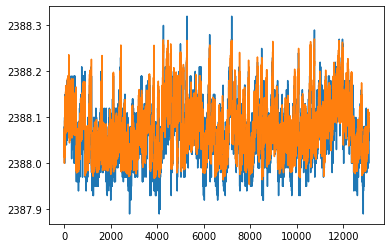

In [ ]:
x=[]
for i in range(len(x_test)):
  x.append(i)
y2 = pred_y_test
y1 = y_test_v
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y2, y1)

0.5357094948480419